* Input

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv('.//data_soc.csv',encoding= 'unicode_escape')
data.head(5)

,Wh,Ah,Voltage (V),Temp ©,Chamber_Temp ©,Time(s)\t,Power (W)\t,Current (A)\t
0,-0.00018,-0.00004,4.1735,25.440,25,0.000,-6.5948,-1.5802
1,-0.00036,-0.00009,4.1356,25.653,25,0.104,-6.6024,-1.5965
2,-0.00054,-0.00013,4.1246,25.653,25,0.210,-6.6253,-1.6063
3,-0.00073,-0.00018,4.1208,25.653,25,0.304,-6.6427,-1.6120
4,-0.00091,-0.00022,4.1188,25.642,25,0.398,-6.6530,-1.6153


In [33]:
data.dtypes

Wh                float64
Ah                float64
Voltage (V)       float64
Temp ©            float64
Chamber_Temp ©      int64
Time(s)\t         float64
Power (W)\t       float64
Current (A)\t     float64
dtype: object

**Graphs**

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

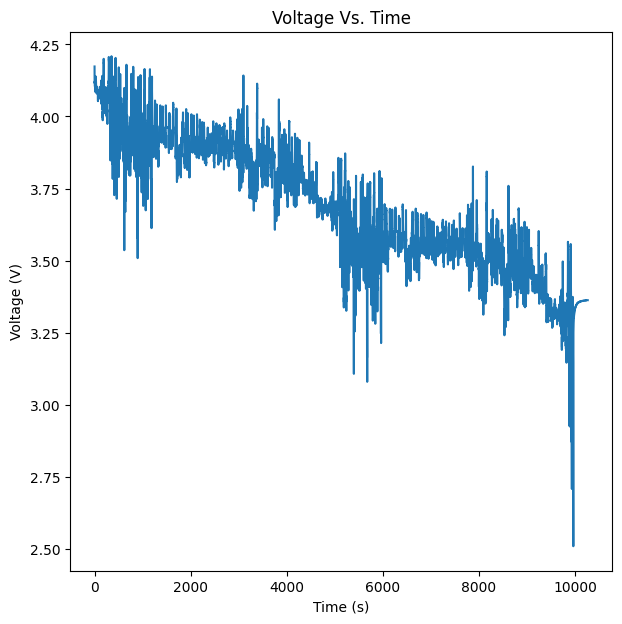

In [35]:
plt.figure(figsize=(7,7))
plt.plot(data['Time(s)\t'], data['Voltage (V)'])
plt.title('Voltage Vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

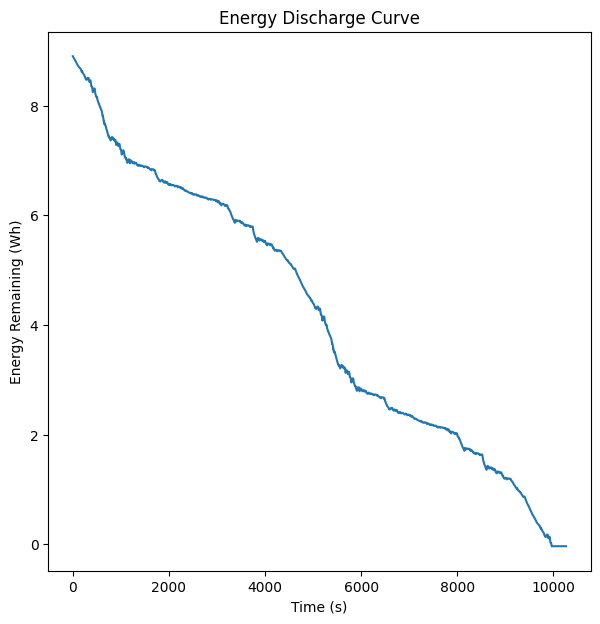

In [36]:
plt.figure(figsize=(7,7))
plt.title('Energy Discharge Curve')
plt.xlabel('Time (s)')
plt.ylabel('Energy Remaining (Wh)')
plt.plot(data['Time(s)\t'], data['Wh']+8.9)
plt.show()

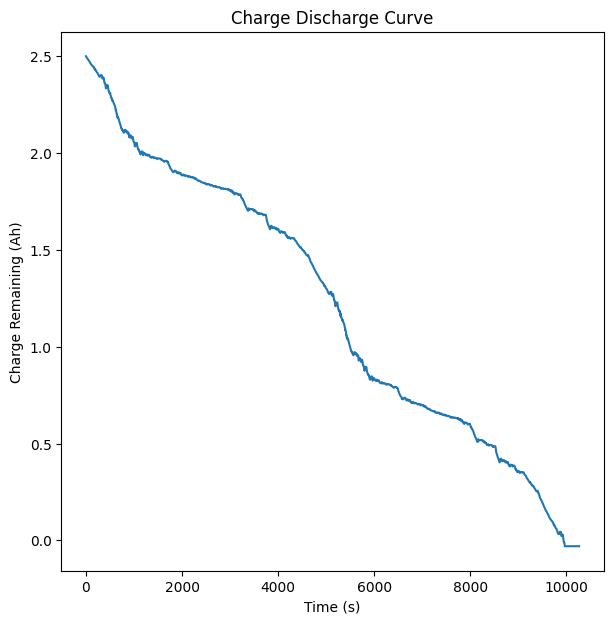

In [37]:
plt.figure(figsize=(7,7))
plt.title('Charge Discharge Curve')
plt.xlabel('Time (s)')
plt.ylabel('Charge Remaining (Ah)')
plt.plot(data['Time(s)\t'], data['Ah']+2.5)
plt.show()

* Dropping unnecessary columns 

In [38]:
data.drop(['Power (W)\t', 'Time(s)\t', 'Chamber_Temp ©'], axis=1, inplace=True)
data

,Wh,Ah,Voltage (V),Temp ©,Current (A)\t
0,-0.00018,-0.00004,4.1735,25.440,-1.5802
1,-0.00036,-0.00009,4.1356,25.653,-1.5965
2,-0.00054,-0.00013,4.1246,25.653,-1.6063
3,-0.00073,-0.00018,4.1208,25.653,-1.6120
4,-0.00091,-0.00022,4.1188,25.642,-1.6153
...,...,...,...,...,...
102436,-8.93690,-2.53030,3.3624,27.514,0.0000
102437,-8.93690,-2.53030,3.3624,27.514,0.0000
102438,-8.93690,-2.53030,3.3624,27.525,0.0000
102439,-8.93690,-2.53030,3.3624,27.525,0.0000


**SOC and SOE**

* Generating the target variables (SOC & SOE)

In [39]:
#Making sure that no column has missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102441 entries, 0 to 102440
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Wh            102441 non-null  float64
 1   Ah            102441 non-null  float64
 2   Voltage (V)   102441 non-null  float64
 3   Temp ©        102441 non-null  float64
 4   Current (A)	  102441 non-null  float64
dtypes: float64(5)
memory usage: 3.9 MB


* Generating target variables

In [40]:
data['SOC'] = (data['Ah'] + 2.55)/2.55
data['SOE'] = (data['Wh']+8.94)/8.94
data.drop(['Ah', 'Wh'], axis=1, inplace=True)
data

,Voltage (V),Temp ©,Current (A)\t,SOC,SOE
0,4.1735,25.440,-1.5802,0.999984,0.999980
1,4.1356,25.653,-1.5965,0.999965,0.999960
2,4.1246,25.653,-1.6063,0.999949,0.999940
3,4.1208,25.653,-1.6120,0.999929,0.999918
4,4.1188,25.642,-1.6153,0.999914,0.999898
...,...,...,...,...,...
102436,3.3624,27.514,0.0000,0.007725,0.000347
102437,3.3624,27.514,0.0000,0.007725,0.000347
102438,3.3624,27.525,0.0000,0.007725,0.000347
102439,3.3624,27.525,0.0000,0.007725,0.000347


* Train and test data split

In [41]:
from sklearn.model_selection import train_test_split 

In [42]:


Y_SOC = data['SOC']
Y_SOE = data['SOE']

X_SOC = data.drop(['SOC', 'SOE'], axis=1)
X_SOE = data.drop(['SOE'], axis=1)

X_train_SOC, X_test_SOC, Y_train_SOC, Y_test_SOC = train_test_split(X_SOC, Y_SOC, train_size=0.8, random_state=1)
X_train_SOE, X_test_SOE, Y_train_SOE, Y_test_SOE = train_test_split(X_SOE, Y_SOE, train_size=0.8, random_state=1)

X_train_SOC.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
X_test_SOC.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train_SOC.reset_index(level=None, drop=True, inplace=True)
Y_test_SOC.reset_index(level=None, drop=True, inplace=True)

X_train_SOE.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
X_test_SOE.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train_SOE.reset_index(level=None, drop=True, inplace=True)
Y_test_SOE.reset_index(level=None, drop=True, inplace=True)

In [43]:
X_train_SOC

,Voltage (V),Temp ©,Current (A)\t
0,3.5224,25.844,-1.36860
1,4.0862,28.354,4.22870
2,3.4832,28.489,-2.71200
3,3.9073,26.045,0.00000
4,3.4182,26.057,-2.93000
...,...,...,...
81947,3.6588,26.258,-1.71900
81948,3.1840,27.301,-3.02800
81949,3.9741,27.312,-2.29630
81950,3.5642,25.855,-0.16577


In [44]:
X_train_SOE

,Voltage (V),Temp ©,Current (A)\t,SOC
0,3.5224,25.844,-1.36860,0.271961
1,4.0862,28.354,4.22870,0.803118
2,3.4832,28.489,-2.71200,0.396431
3,3.9073,26.045,0.00000,0.744961
4,3.4182,26.057,-2.93000,0.252824
...,...,...,...,...
81947,3.6588,26.258,-1.71900,0.527922
81948,3.1840,27.301,-3.02800,0.034039
81949,3.9741,27.312,-2.29630,0.918545
81950,3.5642,25.855,-0.16577,0.265255


* No missing and categorial values

**Correlation check b/w features**

c:\Users\dkvhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\dkvhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


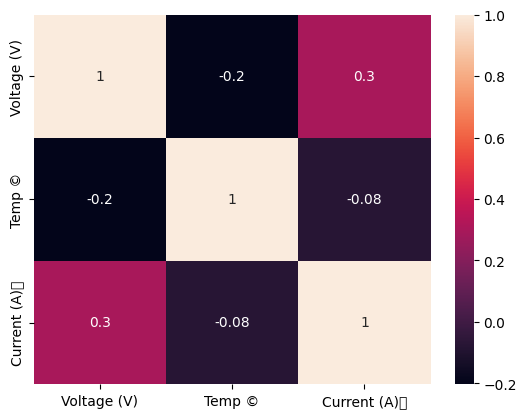

In [45]:
import seaborn as sns

plt.figure()
sns.heatmap(X_train_SOC.corr(method='pearson'), annot=True)
plt.show()

* No heavily correlated features(+ve & -ve)

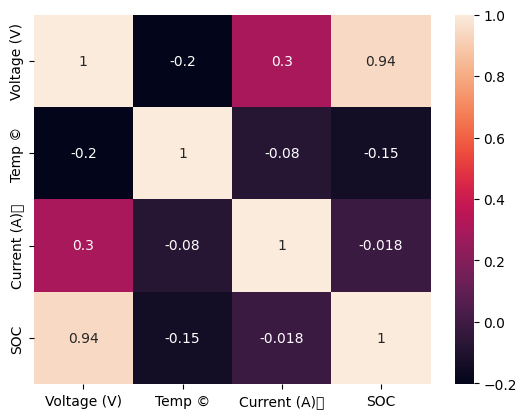

In [46]:
plt.figure()
sns.heatmap(X_train_SOE.corr(method='pearson'), annot=True)
plt.show()

* No heavily correlated features(+ve & -ve)

**Outliers**

In [47]:
# Importing the necessary libraries
import numpy as np
from scipy.stats import norm

* Voltage(v)

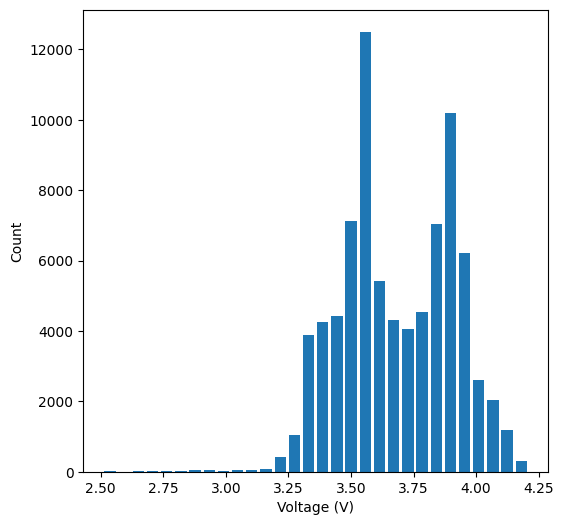

In [48]:
plt.figure(figsize=(6,6))
plt.xlabel('Voltage (V)')
plt.ylabel('Count')
plt.hist(X_train_SOC['Voltage (V)'], bins=30, rwidth=0.8)
plt.show()

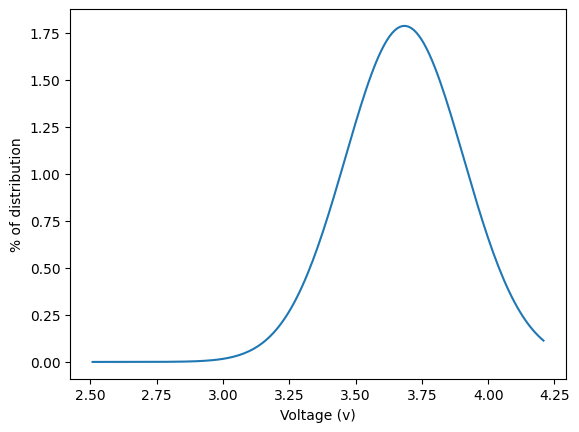

In [49]:
rng = np.arange(X_train_SOC['Voltage (V)'].min(), X_train_SOC['Voltage (V)'].max(), 0.01)
plt.xlabel('Voltage (v)')
plt.ylabel('% of distribution')
plt.plot(rng, norm.pdf(rng, X_train_SOC['Voltage (V)'].mean(), X_train_SOC['Voltage (V)'].std()))
plt.show()

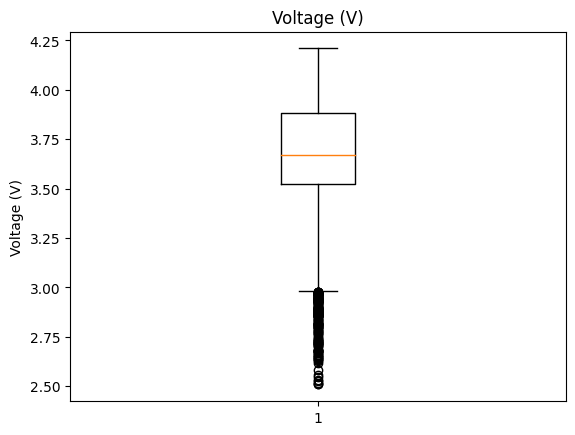

In [50]:
plt.boxplot(X_train_SOC['Voltage (V)'])
plt.ylabel('Voltage (V)')
plt.title('Voltage (V)')
plt.show()

In [51]:
X_train_SOC['voltage_z_score'] = (X_train_SOC['Voltage (V)'] - X_train_SOC['Voltage (V)'].mean())/X_train_SOC['Voltage (V)'].std()

to_be_included = ((X_train_SOC['voltage_z_score']>-3) & (X_train_SOC['voltage_z_score']<3))

X_train_SOC = X_train_SOC[to_be_included]
X_train_SOE = X_train_SOE[to_be_included]
Y_train_SOC = Y_train_SOC[to_be_included]
Y_train_SOE = Y_train_SOE[to_be_included]

X_train_SOC.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train_SOC.reset_index(level=None, drop=True, inplace=True)
X_train_SOE.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train_SOE.reset_index(level=None, drop=True, inplace=True)

X_train_SOC.drop(['voltage_z_score'], axis=1, inplace=True)

C:\Users\dkvhe\AppData\Local\Temp\ipykernel_18560\392066229.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_SOC.drop(['voltage_z_score'], axis=1, inplace=True)


* Current(A)

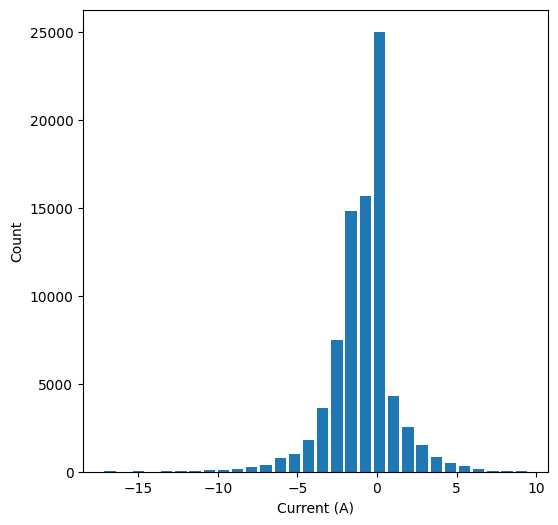

In [52]:
plt.figure(figsize=(6,6))
plt.xlabel('Current (A)')
plt.ylabel('Count')
plt.hist(X_train_SOC['Current (A)\t'], bins=30, rwidth=0.8)
plt.show()

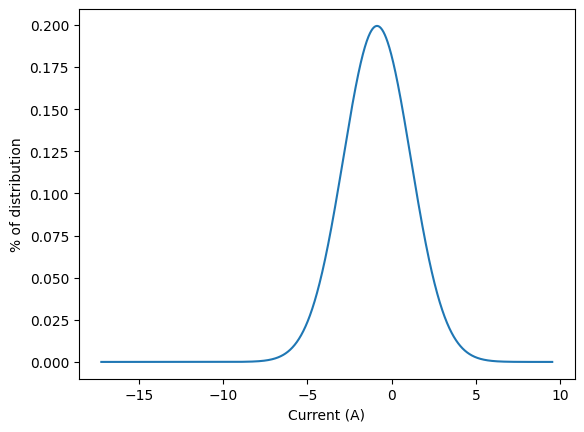

In [53]:
rng = np.arange(X_train_SOC['Current (A)\t'].min(), X_train_SOC['Current (A)\t'].max(), 0.01)
plt.xlabel('Current (A)')
plt.ylabel('% of distribution')
plt.plot(rng, norm.pdf(rng, X_train_SOC['Current (A)\t'].mean(), X_train_SOC['Current (A)\t'].std()))
plt.show()

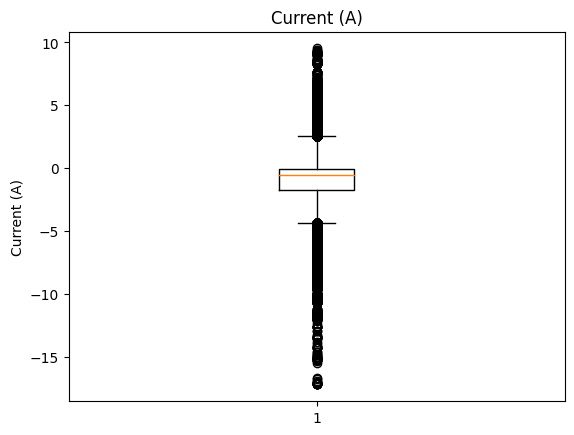

In [54]:
plt.boxplot(X_train_SOC['Current (A)\t'])
plt.ylabel('Current (A)')
plt.title('Current (A)')
plt.show()

In [55]:
X_train_SOC['current_z_score'] = (X_train_SOC['Current (A)\t'] - X_train_SOC['Current (A)\t'].mean())/X_train_SOC['Current (A)\t'].std()

to_be_included = ((X_train_SOC['current_z_score']>-3) & (X_train_SOC['current_z_score']<3))

X_train_SOC = X_train_SOC[to_be_included]
X_train_SOE = X_train_SOE[to_be_included]
Y_train_SOC = Y_train_SOC[to_be_included]
Y_train_SOE = Y_train_SOE[to_be_included]

X_train_SOC.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train_SOC.reset_index(level=None, drop=True, inplace=True)
X_train_SOE.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train_SOE.reset_index(level=None, drop=True, inplace=True)

X_train_SOC.drop(['current_z_score'], axis=1, inplace=True)

C:\Users\dkvhe\AppData\Local\Temp\ipykernel_18560\2781505856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_SOC['current_z_score'] = (X_train_SOC['Current (A)\t'] - X_train_SOC['Current (A)\t'].mean())/X_train_SOC['Current (A)\t'].std()


* Temp(c)

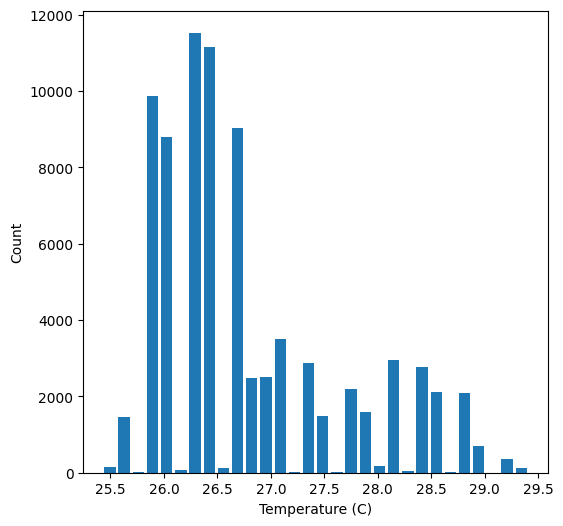

In [56]:
plt.figure(figsize=(6,6))
plt.xlabel('Temperature (C)')
plt.ylabel('Count')
plt.hist(X_train_SOC['Temp ©'], bins=30, rwidth=0.8)
plt.show()

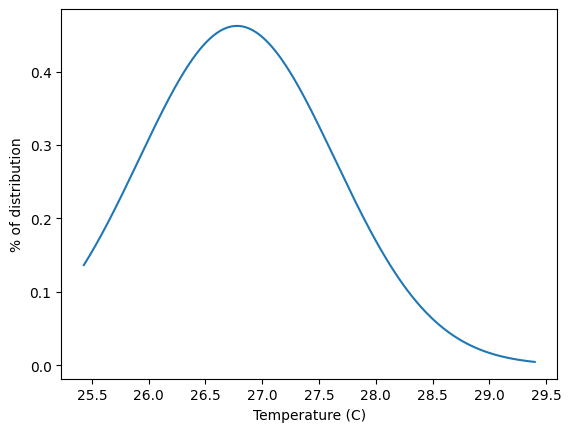

In [57]:
rng = np.arange(X_train_SOC['Temp ©'].min(), X_train_SOC['Temp ©'].max(), 0.01)
plt.xlabel('Temperature (C)')
plt.ylabel('% of distribution')
plt.plot(rng, norm.pdf(rng, X_train_SOC['Temp ©'].mean(), X_train_SOC['Temp ©'].std()))
plt.show()

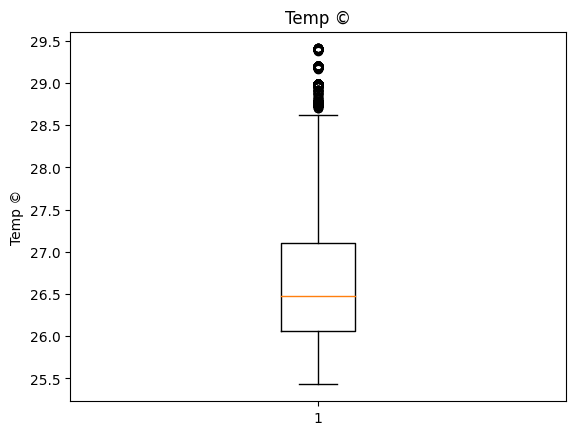

In [58]:
plt.boxplot(X_train_SOC['Temp ©'])
plt.ylabel('Temp ©')
plt.title('Temp ©')
plt.show()

In [59]:
X_train_SOC['temp_z_score'] = (X_train_SOC['Temp ©'] - X_train_SOC['Temp ©'].mean())/X_train_SOC['Temp ©'].std()

to_be_included = ((X_train_SOC['temp_z_score']>-3) & (X_train_SOC['temp_z_score']<3))

X_train_SOC = X_train_SOC[to_be_included]
X_train_SOE = X_train_SOE[to_be_included]
Y_train_SOC = Y_train_SOC[to_be_included]
Y_train_SOE = Y_train_SOE[to_be_included]

X_train_SOC.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train_SOC.reset_index(level=None, drop=True, inplace=True)
X_train_SOE.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train_SOE.reset_index(level=None, drop=True, inplace=True)

X_train_SOC.drop(['temp_z_score'], axis=1, inplace=True)


**ML Model**

In [60]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential, load_model
from sklearn.metrics import mean_absolute_error

* Normalize

* SOC

In [61]:
#data normalization
cols_to_be_normalized = ['Voltage (V)', 'Current (A)\t', 'Temp ©']

for e in cols_to_be_normalized:
  mean = X_train_SOC[e].mean()
  std = X_train_SOC[e].std()
  X_train_SOC[e] = (X_train_SOC[e]-mean)/std
  X_train_SOE[e] = (X_train_SOE[e]-mean)/std
  
  X_test_SOC[e] = (X_test_SOC[e]-mean)/std
  X_test_SOE[e] = (X_test_SOE[e]-mean)/std

In [64]:
model_SOC = Sequential()
model_SOC.add(Dense(units=5, activation='relu', input_dim=len(X_train_SOC.columns)))
model_SOC.add(Dense(units=5, activation='relu'))
model_SOC.add(Dense(units=1, activation='linear'))

# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

es=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=30,verbose=1,mode='auto')

opt = keras.optimizers.Adam(0.001)
model_SOC.compile(loss='mse', optimizer=opt, metrics='mse')
model_SOC.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 20        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [65]:
hs = model_SOC.fit(X_train_SOC, Y_train_SOC, epochs=700, batch_size=512, validation_split=0.2, validation_data=None, verbose=1, callbacks=[es])

Epoch 1/700
126/126 [==============================] - 1s 3ms/step - loss: 0.3535 - mse: 0.3535 - val_loss: 0.1613 - val_mse: 0.1613
Epoch 2/700
126/126 [==============================] - 0s 2ms/step - loss: 0.0901 - mse: 0.0901 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 3/700
126/126 [==============================] - 0s 2ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4/700
126/126 [==============================] - 0s 1ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 5/700
126/126 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 6/700
126/126 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 7/700
126/126 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 8/700
126/126 [==============================] - 0s 2ms/step - 

In [ ]:
h=hs.history
h.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

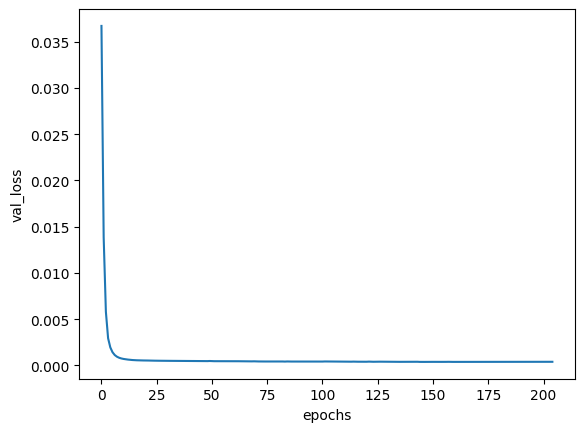

In [ ]:
plt.ylabel('val_loss')
plt.xlabel('epochs')
plt.plot(h['val_loss'])
plt.show()

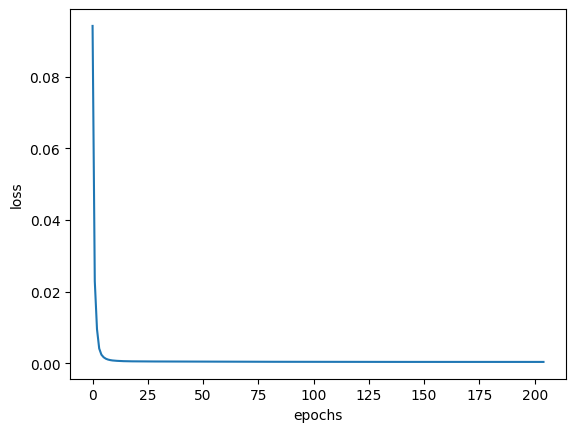

In [ ]:
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(h['loss'])
plt.show()

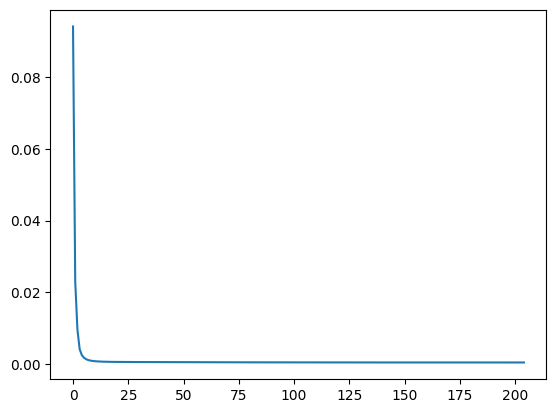

In [ ]:
plt.plot(h['mse'])

In [ ]:
predictions = (model_SOC.predict(X_test_SOC))
print('Mean absolute error: '+str(mean_absolute_error(Y_test_SOC, predictions)))

641/641 [==============================] - 0s 538us/step
Mean absolute error: 0.014623167168198958


In [ ]:
#Accuracy SOC model
acc = 1 - np.sqrt(mean_absolute_error(Y_test_SOC, predictions))
acc

0.8790737118398197

In [ ]:
compare = pd.concat([pd.DataFrame(predictions), pd.DataFrame(Y_test_SOC)], axis=1)
compare.columns = ['Predictions', 'Actual Output']
compare

,Predictions,Actual Output
0,0.153011,0.183373
1,0.799864,0.795612
2,0.268285,0.269412
3,0.302023,0.297020
4,0.821633,0.794502
...,...,...
20484,0.166437,0.178588
20485,1.006298,0.930071
20486,0.338088,0.329137
20487,0.884616,0.887153


* SOE

In [ ]:
model_SOE = Sequential()
model_SOE.add(Dense(units=5, activation='relu', input_dim=len(X_train_SOE.columns)))
model_SOE.add(Dense(units=5, activation='relu'))
model_SOE.add(Dense(units=1, activation='linear'))

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

opt = keras.optimizers.Adam(0.001)
model_SOE.compile(loss='mse', optimizer=opt, metrics='mse')
model_SOE.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 25        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hs = model_SOE.fit(X_train_SOE, Y_train_SOE, epochs=700, batch_size=512, validation_split=0.2, validation_data=None, verbose=1, callbacks=[es])

Epoch 1/700
126/126 [==============================] - 1s 2ms/step - loss: 0.0740 - mse: 0.0740 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 2/700
126/126 [==============================] - 0s 1ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 3/700
126/126 [==============================] - 0s 1ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 4/700
126/126 [==============================] - 0s 1ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 5/700
126/126 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 6/700
126/126 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 7/700
126/126 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/700
126/126 [==============================] - 0s 2ms/step - 

In [ ]:
h=hs.history
h.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [ ]:
predictions = (model_SOE.predict(X_test_SOE))
print('Mean absolute error: '+str(mean_absolute_error(Y_test_SOE, predictions)))

641/641 [==============================] - 0s 600us/step
Mean absolute error: 0.0008240243712780419


In [ ]:
#Accuracy of SOE model
acc = 1 - np.sqrt(mean_absolute_error(Y_test_SOC, predictions))
acc

0.8511560571261807

In [ ]:
compare = pd.concat([pd.DataFrame(predictions), pd.DataFrame(Y_test_SOE)], axis=1)
compare.columns = ['Predictions', 'Actual Output']
compare

,Predictions,Actual Output
0,0.161298,0.161857
1,0.777971,0.777673
2,0.244460,0.244004
3,0.271357,0.271443
4,0.777336,0.776499
...,...,...
20484,0.157434,0.157908
20485,0.920528,0.921808
20486,0.302690,0.302908
20487,0.874473,0.874161


In [ ]:
model_SOC.save("model_SOC.h5")
model_SOE.save("model_SOE.h5")
print("Saved model to disk")

Saved model to disk
